Reference: http://www.pyimagesearch.com/2016/09/26/a-simple-neural-network-with-python-and-keras/

https://github.com/Vict0rSch/deep_learning/blob/master/keras/feedforward/feedforward_keras_mnist.py

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import backend as K
import keras

Using TensorFlow backend.
/Users/karanuppal/anaconda/envs/gl-env/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Feed_Forward_Network with 1 Hidden Layer - Configuration -- [784,100,10]

In [81]:
def load_data():
    print 'Loading data...'
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    
    print 'Data loaded.'
    return [X_train, X_test, y_train, y_test]
    

def init_model():
    start_time = time.time()
    print 'Compiling Model ... '
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Dropout(0.25))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    rms = RMSprop()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])
    print 'Model compield in {0} seconds'.format(time.time() - start_time)
    return model


def run_network(data=None, model=None, epochs=20, batch=128):
        start_time = time.time()
        if data is None:
            X_train, X_test, y_train, y_test = load_data()
        else:
            X_train, X_test, y_train, y_test = data

        if model is None:
            model = init_model()
        print 'Training model...'        
        hist=model.fit(X_train, y_train, batch_size=batch,
                           nb_epoch=epochs,
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X_test, y_test))
        print "Training duration : {0}".format(time.time() - start_time)
        score = model.evaluate(X_test, y_test, batch_size=16)
        print "Network's test score [loss, accuracy]: {0}".format(score)
        return hist 

# data = load_data()
hist=run_network(data=data)
#plot_losses(losses)
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

FeedForward Network with 2 Hidden Layers

In [89]:
def load_data():
    print 'Loading data...'
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    
    print 'Data loaded.'
    return [X_train, X_test, y_train, y_test]
    

def init_model():
    start_time = time.time()
    print 'Compiling Model ... '
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Dropout(0.25))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    rms = RMSprop()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])
    print 'Model compield in {0} seconds'.format(time.time() - start_time)
    return model


def run_network(data=None, model=None, epochs=20, batch=128):
        start_time = time.time()
        if data is None:
            X_train, X_test, y_train, y_test = load_data()
        else:
            X_train, X_test, y_train, y_test = data

        if model is None:
            model = init_model()
        print 'Training model...'        
        hist=model.fit(X_train, y_train, batch_size=batch,
                           nb_epoch=epochs,
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X_test, y_test))
        print "Training duration : {0}".format(time.time() - start_time)
        score = model.evaluate(X_test, y_test, batch_size=16)
        print "Network's test score [loss, accuracy]: {0}".format(score)
        return hist 

Loading data...
Data loaded.
Compiling Model ... 
Model compield in 0.151681900024 seconds
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
7s - loss: 0.3249 - acc: 0.8982 - val_loss: 0.1401 - val_acc: 0.9557
Epoch 2/20
7s - loss: 0.1412 - acc: 0.9567 - val_loss: 0.1270 - val_acc: 0.9625
Epoch 3/20
6s - loss: 0.1029 - acc: 0.9684 - val_loss: 0.1107 - val_acc: 0.9673
Epoch 4/20
6s - loss: 0.0846 - acc: 0.9735 - val_loss: 0.0803 - val_acc: 0.9749
Epoch 5/20
6s - loss: 0.0722 - acc: 0.9778 - val_loss: 0.0969 - val_acc: 0.9736
Epoch 6/20
6s - loss: 0.0648 - acc: 0.9804 - val_loss: 0.1080 - val_acc: 0.9679
Epoch 7/20
6s - loss: 0.0570 - acc: 0.9819 - val_loss: 0.1374 - val_acc: 0.9668
Epoch 8/20
7s - loss: 0.0539 - acc: 0.9838 - val_loss: 0.0820 - val_acc: 0.9786
Epoch 9/20
6s - loss: 0.0488 - acc: 0.9846 - val_loss: 0.0725 - val_acc: 0.9807
Epoch 10/20
6s - loss: 0.0463 - acc: 0.9855 - val_loss: 0.0669 - val_acc: 0.9817
Epoch 11/20
6s - loss: 0.0412 - acc: 0.9

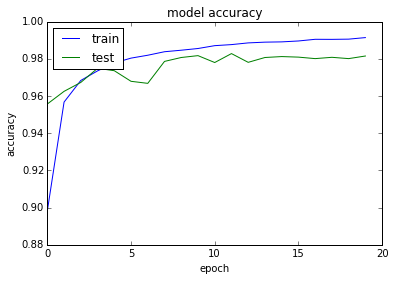

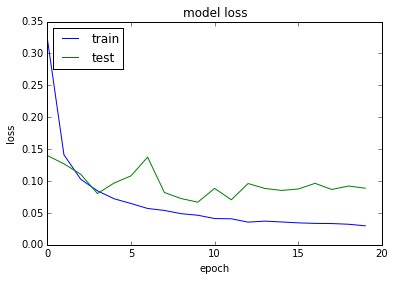

In [90]:
data = load_data()
hist=run_network(data=data)
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Feed Forward Network with Momemtum

In [91]:
def load_data():
    print 'Loading data...'
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    
    print 'Data loaded.'
    return [X_train, X_test, y_train, y_test]
    

def init_model():
    start_time = time.time()
    print 'Compiling Model ... '
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Dropout(0.25))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    rms = RMSprop()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05,momentum=0.9), metrics=['accuracy'])
    print 'Model compield in {0} seconds'.format(time.time() - start_time)
    return model


def run_network(data=None, model=None, epochs=20, batch=128):
        start_time = time.time()
        if data is None:
            X_train, X_test, y_train, y_test = load_data()
        else:
            X_train, X_test, y_train, y_test = data

        if model is None:
            model = init_model()
        print 'Training model...'        
        hist=model.fit(X_train, y_train, batch_size=batch,
                           nb_epoch=epochs,
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X_test, y_test))
        print "Training duration : {0}".format(time.time() - start_time)
        score = model.evaluate(X_test, y_test, batch_size=16)
        print "Network's test score [loss, accuracy]: {0}".format(score)
        return hist 

Loading data...
Data loaded.
Compiling Model ... 
Model compield in 0.185832977295 seconds
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
7s - loss: 0.6230 - acc: 0.8100 - val_loss: 0.2546 - val_acc: 0.9247
Epoch 2/20
6s - loss: 0.2722 - acc: 0.9197 - val_loss: 0.1895 - val_acc: 0.9411
Epoch 3/20
6s - loss: 0.2112 - acc: 0.9371 - val_loss: 0.1515 - val_acc: 0.9550
Epoch 4/20
9s - loss: 0.1776 - acc: 0.9478 - val_loss: 0.1310 - val_acc: 0.9604
Epoch 5/20
6s - loss: 0.1558 - acc: 0.9531 - val_loss: 0.1178 - val_acc: 0.9634
Epoch 6/20
7s - loss: 0.1382 - acc: 0.9588 - val_loss: 0.1067 - val_acc: 0.9668
Epoch 7/20
7s - loss: 0.1249 - acc: 0.9631 - val_loss: 0.1011 - val_acc: 0.9687
Epoch 8/20
8s - loss: 0.1147 - acc: 0.9651 - val_loss: 0.0932 - val_acc: 0.9702
Epoch 9/20
8s - loss: 0.1051 - acc: 0.9680 - val_loss: 0.0877 - val_acc: 0.9720
Epoch 10/20
8s - loss: 0.0974 - acc: 0.9702 - val_loss: 0.0821 - val_acc: 0.9728
Epoch 11/20
6s - loss: 0.0918 - acc: 0.9

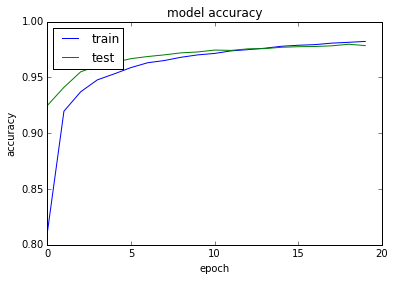

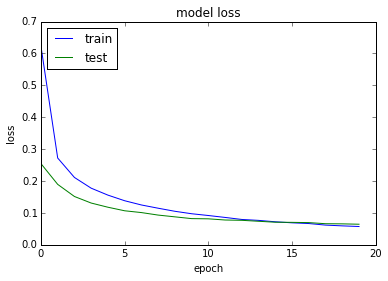

In [92]:
data = load_data()
hist=run_network(data=data)
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

FeedForward Network with Momentum and Regularization

In [2]:
from keras import regularizers
def load_data():
    print 'Loading data...'
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    
    print 'Data loaded.'
    return [X_train, X_test, y_train, y_test]
    

def init_model():
    start_time = time.time()
    print 'Compiling Model ... '
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.25))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    rms = RMSprop()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05,momentum=0.9), metrics=['accuracy'])
    print 'Model compield in {0} seconds'.format(time.time() - start_time)
    return model


def run_network(data=None, model=None, epochs=20, batch=128):
        start_time = time.time()
        if data is None:
            X_train, X_test, y_train, y_test = load_data()
        else:
            X_train, X_test, y_train, y_test = data

        if model is None:
            model = init_model()
        print 'Training model...'        
        hist=model.fit(X_train, y_train, batch_size=batch,
                           nb_epoch=epochs,
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X_test, y_test))
        print "Training duration : {0}".format(time.time() - start_time)
        score = model.evaluate(X_test, y_test, batch_size=16)
        print "Network's test score [loss, accuracy]: {0}".format(score)
        return hist 

Loading data...
Data loaded.
Compiling Model ... 
Model compield in 0.515983104706 seconds
Training model...


/Users/karanuppal/anaconda/envs/gl-env/lib/python2.7/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
9s - loss: nan - acc: 0.0991 - val_loss: nan - val_acc: 0.0980
Epoch 2/20
8s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 3/20
7s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 4/20
9s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 5/20
8s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 6/20
8s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 7/20
8s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 8/20
10s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 9/20
8s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 10/20
8s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 11/20
9s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 12/20
9s - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 13/20
9s - loss: nan - acc: 0.0987 - val_loss: nan -

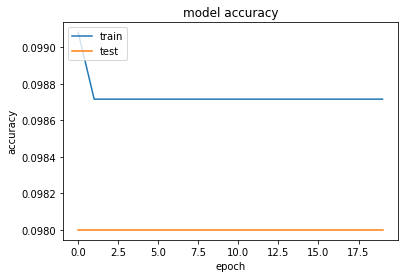

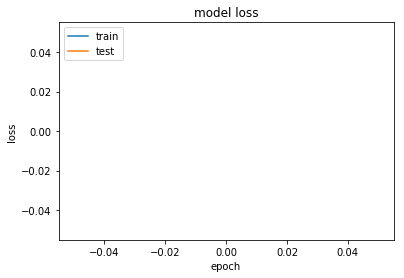

In [3]:
data = load_data()
hist=run_network(data=data)
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()